# Gaussian Orbits

In this homework, we will use linear regression methods in order to determine the orbits of heavenly bodies.

### Background

In 1801 the minor planet Ceres was first observed for a period of 40 days before moving behind the sun. To predict the location of Ceres astronomers would have to solve complicated non-linear differential equations, quite a task in an era before computers or calculators. However, Carl Friedrich Gauss had another idea. By single handedly developing the theory of least squares and linear regression and applying it to the problem of finding Ceres, Gauss managed to accurately predict the location of the minor planet nearly a year after it's last sighting.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/33/Bendixen_-_Carl_Friedrich_Gau%C3%9F%2C_1828.jpg" width=400px>

In this problem we likewise attempt to predict the orbit of a "planet" and in the process "derive" the formula for an ellipse, the shape of orbits of heavenly bodies.

### 0. Import a bunch of stuff!

Imports needed in this notebook: `numpy`, `matplotlib.pyplot`, from sklearn: `LinearRegression`, `ElasticNet`, and `mean_squared_error`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error

### 1. Generate Data

The idea here is we generate data in the shape of an ellipse. To do this we use the formula of an ellipse in polar coordinates:

$$ r = \frac{ep}{1-e \cos(\theta)} $$

where $ e $ is the eccentricity and $ p $ is the distance from the minor axis to the directrix (read "length"). In addition, we add random noise to the data.

We will then try to fit curves to our synthetic dataset.

In [23]:
reg = LinearRegression()

ar = np.array([[[1],[2],[3]], [[2.01],[4.03],[6.04]]])
y = ar[1]
x = ar[0]

reg.fit(x,y)

reg.coef_

array([[2.015]])

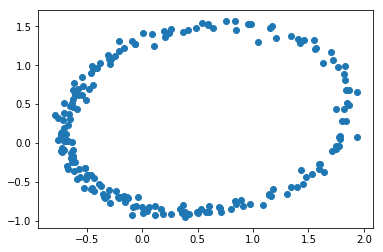

In [53]:
def gen_data(e, p, o):
    theta = np.linspace(0,2*np.pi, 200)

    # Ellipse with eccentricity e
    # Axis "length" p
    # Offset by .5 angularly
    r = e*p/(1-e*np.cos(theta - o)) 

    # transform to cartesian
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Add noise
    x += np.random.randn(x.shape[0]) / 20
    y += np.random.randn(y.shape[0]) / 20

    # plot
    plt.scatter(x, y)
    plt.show()

    # saving
    np.save('x.npy', x)
    np.save('y.npy', y)

gen_data(.5, 2, .5)

### 2. Use sklearn's LinearRegression

Try to fit a `LinearRegression` model to `x` and `y` (let $ x $ be the independent variable and $ y $ be the dependent variable). Print out the `mean_squared_error` you get and plot both `x`, `y` (scatter plot), and the predicted orbit (line plot).

This is a really dumb idea, please explain:

In [37]:
np.array([])

array([], dtype=float64)

In [35]:
a = LinearRegression()

ar = np.array([[[1],[2],[3]], [[2.01],[4.03],[6.04]]])
y = ar[1,:]
x = ar[0,:]

xTest = np.array([[4],[5],[6]])
ytest =  np.array([[9],[8.5],[14]])

a.fit(x,y)
prediction = a.predict(xTest)


### 3. Experimentation time!

Try adding new features to your linear model by manipulating $ x $! For example, try adding a quadratic term, $ x^2 $ or a root term like $ \sqrt{x} $. Print out the MSE of your model and plot both `x`, `y` (scatter plot), and the predicted orbit (line plot). This time, your model should take in an expanded set of features and predict $ y $.

Hint: `np.vstack` may be useful here.

This is still a really dumb idea, please explain:

In [ ]:
### YOUR CODE HERE

### 4. Plane Curves

As you've probably figured out, the above two methods are pretty crap at predicting orbits. What we really need to do is predict a curve in the plane. First, let's erase some of the data so what we're doing is actually a challenge. Just run the code in the next box:

In [ ]:
# Create a mask where x < 0 or y < 0
def mask():
    global x
    global y
    
    mask = (x < 0) + (y < 0)
    x = x[mask]
    y = y[mask]
    
    # plot erased data
    plt.scatter(x, y)
    plt.show()

mask()

Now the most general form of a plane curve is

$$ f(x,y) = 0 $$

In order to simplify our lives a bit, let's restrict this to something of the form:

$$ ax^2 + bxy + cy^2 + dx + ey + f = 0 $$

You may recognize this as the general form of a conic! Let's take our data and try to predict the best possible coefficients here using least squares. This way, these coefficients should give the best possible approximation to the orbit. Print your predicted coefficients.

Hint: Think about the features you need. (6 total)

Hint: Use the normal equation instead of sklearn.

Hint: This is going to fail, why?

In [ ]:
### YOUR CODE HERE

### 5. Reformulation

The above should fail for a very trivial (pun intended) reason. The reason is that if we simply set all the coefficients to zero, we get a perfect solution! We can see this in the normal equations:

$$ (A^TA)^{-1} A^T b = x $$

but $ b = \vec 0 $ in our case, thus $ x = \vec 0 $ trivially.

How do we get around this? One thing we can do is to not have $ b = \vec 0 $. To do this, let us modify the general form of a plane curve a bit:

$$ f(x,y) + 1 = 1 $$

Now our restricted plane curve will be of the form

$$ ax^2 + bxy + cy^2 + dx + ey + f + 1 = 1 $$

Is this just an aesthetic change? or will this actually help? Code it up and find out! Plot your model using the handy dandy `plot_conic` function

In [ ]:
# This function should help you plot your ellipses:

def plot_conic(coeff):
    '''
    params
    ------
    coeff : array[6] floats
        Array of 6 floats, corresponding to 
        a, b, c, d, e, and f respectively
        in the equation above
    '''
    xv = np.linspace(-9, 9, 400)
    yv = np.linspace(-5, 5, 400)
    xv, yv = np.meshgrid(xv, yv)

    def axes():
        plt.axhline(0, alpha=.1)
        plt.axvline(0, alpha=.1)

    axes()
    plt.contour(xv, yv, xv*xv*coeff[0] + xv*yv*coeff[1] + yv*yv*coeff[2] + xv*coeff[3] + yv*coeff[4] + coeff[5], [0], colors='k')
    plt.scatter(x,y)
    plt.show()

In [ ]:
### YOUR CODE HERE

### 6. Ridge

So, reformulating the problem might have worked, but more than likely it didn't work too well. Here's some code to generate new data. Try running the above model multiple times on different data. More than likely most of them will look terrible.

In [ ]:
# Regenerate data
gen_data(.5, 2, .5)
mask()

The problem here is that our method is too unstable. It turns out the Ridge Regression as a regularizer can reduce numerical instability and constrain under-constrained problems. Try rewriting the regression from above using ridge regression and see how well it does. Plot out the model using `plot_conic`. Compare the results with the previous method.

Hint: Use the `regenerate data` block to try new data

Hint: There is really only one extra term between this question and the previous

In [ ]:
### YOUR CODE HERE

### 7. "Deriving" an Ellipse

LASSO regularization is a _sparse feature selector_ in the sense that it zeros out "useless" features and keeps relevant features. It's a good way to reduce the number of features you have to use. 

In this case we're going to pretend we don't know what form the equation of an ellipse takes. We can add random monomials to form a guess:

$$ ax^2 + bxy + cy^2 + dx + ey + f + gx^3 + hy^3 + jx^2y + \cdots + 1 = 1 $$

The idea here is that if we use LASSO regression on the above equation, the terms irrelevant to an ellipse will "zero out" and the quadratic and lower terms won't! Try this out, and print out the coefficients. No gurantees this will works 100% :), but you should find that all coefficients greater than quadratic zero out.

`Hint`: We want to keep the ridge regularization to maintain numerical stabilitiy. So we need a combined Ridge and LASSO regression. For some reason, this model is called `ElasticNet` from sklearn. Use that model.

`Hint`: You might have to play around with the parameters a bit. I used these `l1_ratio=.23, alpha=.01` to produce some pretty good results

In [ ]:
### YOUR CODE HERE

### 8. Evaluate this model!

Run this code block below. This code block assumes that you have an array called `coeff` which has  10 elements.

In [ ]:
xv = np.linspace(-9, 9, 400)
yv = np.linspace(-5, 5, 400)
xv, yv = np.meshgrid(xv, yv)

def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)

axes()
plt.contour(xv, yv, xv*xv*coeff[0] + xv*yv*coeff[1] + yv*yv*coeff[2] + xv*coeff[3] + yv*coeff[4] + coeff[5] - 1 + coeff[6]*xv*xv*xv + coeff[7]*yv*yv*yv + coeff[8]*xv*xv*yv + coeff[9]*xv*yv*yv , [0], colors='k')
plt.scatter(x,y)
plt.show()

### 9. Poisoned Data

New problem. Scenario: You want to buy a house from a realtor, and you know that the realtor uses a linear regression model to price their houses. You hack into the realtor's comptuer and are allowed to add a single data point to their training set. Add this data point to the training set such that a linear model would predict the first row to have a value of 5.

In [ ]:
boston = np.loadtxt(open("boston.csv", "rb"), delimiter=",", skiprows=1)
X = boston[:,:-1]
y = boston[:, -1]

## Code here

What you've done here is to "poison" a dataset. Essentially messing with the training data to mess with the final model. There are of course many ways to prevent this from happening. Eliminating outliers is one possible method. But there are also many other possible methods to poison a dataset. This idea is very similar to the idea of `adversarial examples`